# <font color="red"> EDA </font>

Let's perform a basic EDA for numerical and categorical variables. For this we need a dataset and then select and/or filter some variables.



In [ ]:
# Base ----------------------------------
import numpy as np
import pandas as pd

# Viz -----------------------------------
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
from google.colab import drive
drive.mount('IEXL')

Mounted at IEXL


In [ ]:
gifted = pd.read_csv('/content/IEXL/MyDrive/IEXL - Bootcamp - Math&Stats/Data Sets/gifted.csv')
gifted.head()

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
0,159,115,117,18,26,1.9,3.00,2.00
1,164,117,113,20,37,2.5,1.75,3.25
2,154,115,118,20,32,2.2,2.75,2.50
3,157,113,131,12,24,1.7,2.75,2.25
4,156,110,109,17,34,2.2,2.25,2.50


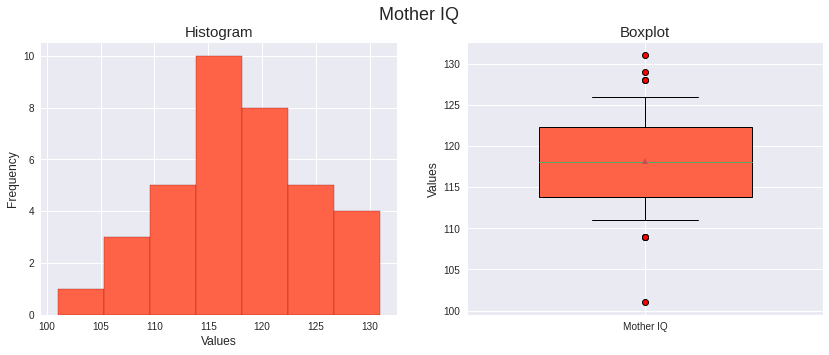

In [ ]:
plt.figure(figsize = (14, 5))
plt.suptitle('Mother IQ', fontsize = 18)

plt.subplot2grid((1,2), (0,0))
plt.hist(gifted['motheriq'],
         ec = 'maroon',
         color = 'tomato',
         bins = 'rice') # 2*n^(1/3)
plt.title('Histogram', fontsize = 15)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.subplot2grid((1,2), (0,1))
plt.boxplot(gifted['motheriq'],
            widths = 0.6,
            patch_artist = True,
            showmeans = True,
            whis = 1.5,
            labels = ['Mother IQ'],
            boxprops = dict(facecolor = 'tomato'),
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red')
            )
plt.title('Boxplot', fontsize = 15)
plt.ylabel('Values', fontsize = 12)

plt.show()

In [ ]:
# CTM
mean = gifted['motheriq'].mean()
median = gifted['motheriq'].median()
mode = gifted['motheriq'].mode()

# Variability
sd = gifted['motheriq'].std()
iqr = gifted['motheriq'].quantile(0.75) - gifted['motheriq'].quantile(0.25)

# Shape
skew = gifted['motheriq'].skew()
kur = gifted['motheriq'].kurt()

# Summary
print('CENTRAL TENDENCY\n',
      '-'*20,
      '\n{:<20}'.format('Mean: '), '{:<4.4f}'.format(mean),
      '\n{:<20}'.format('Median: '), '{:<4.4f}'.format(median),
      '\n{:<20}'.format('Mode: '), [mode[i] for i in range(len(mode))],
      '\n\nVARIABILITY\n',
      '-'*20,
      '\n{:<20}'.format('Standard Deviation: '), '{:<4.4f}'.format(sd),
      '\n{:<20}'.format('IQR: '), '{:<4.4f}\n'.format(iqr),
      '\nSHAPE\n',
      '-'*20,
      '\n{:<20}'.format('Skewness: '), '{:<4.4f}'.format(skew),
      '\n{:<20}'.format('Kurtosis: '), '{:<4.4f}\n'.format(kur))


CENTRAL TENDENCY
 -------------------- 
Mean:                118.1667 
Median:              118.0000 
Mode:                [117, 118] 

VARIABILITY
 -------------------- 
Standard Deviation:  6.5049 
IQR:                 8.5000
 
SHAPE
 -------------------- 
Skewness:            -0.2581 
Kurtosis:            0.2278



In [ ]:
# max(gifted['count']), min(gifted['count']) # Let's choose a boundary at 28 months

# Define a new variable
gifted['count_cat'] = np.where(gifted['count'] <= 28, 'Low', 'High')
gifted['speak_cat'] = np.where(gifted['speak'] <= 18, 'Low', 'High')
gifted.head()

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons,count_cat,speak_cat
0,159,115,117,18,26,1.9,3.00,2.00,Low,Low
1,164,117,113,20,37,2.5,1.75,3.25,High,High
2,154,115,118,20,32,2.2,2.75,2.50,High,High
3,157,113,131,12,24,1.7,2.75,2.25,Low,Low
4,156,110,109,17,34,2.2,2.25,2.50,High,Low


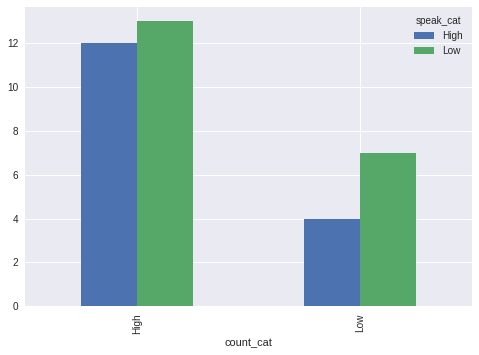

speak_cat,High,Low
count_cat,,
High,12,13
Low,4,7


In [ ]:
freq = gifted.groupby(['count_cat', 'speak_cat']).size().unstack()

freq.plot(kind = 'bar')
plt.show()

freq

Bokeh
Plotly